In [58]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import math

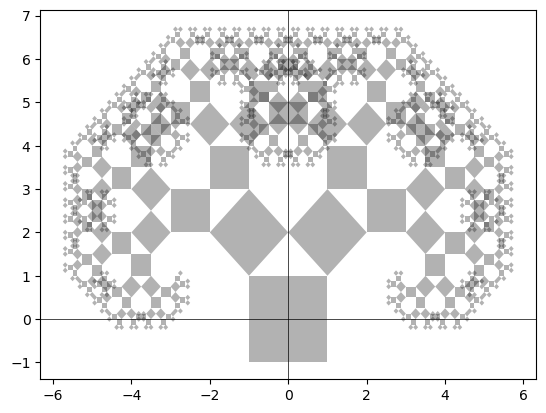

In [55]:
def calc_diff(start, finish):
    return finish - start

start_points = torch.tensor([[1, -1],
                             [-1, -1],
                             [-1, 1],
                             [1, 1],
                             [1, -1]], dtype=torch.float32)  

angle = np.pi / 4
clk_rotation_matrix = torch.tensor([[np.cos(angle), np.sin(angle)],
                                    [-np.sin(angle), np.cos(angle)]], dtype=torch.float32)

anti_clk_rotation_matrix = torch.tensor([[np.cos(angle), -np.sin(angle)],
                                         [np.sin(angle), np.cos(angle)]], dtype=torch.float32)

current_points = start_points


x = current_points[:, 0].numpy()
y = current_points[:, 1].numpy()
plt.fill(x, y, 'k-', alpha=0.3)  

def left_square(current_points):
    rotated_points = torch.matmul(current_points, clk_rotation_matrix)
    rotated_points /= np.sqrt(2) 
    x_delta, y_delta = calc_diff(current_points[2], rotated_points[1])  

    rotated_points[:, 0] -= x_delta
    rotated_points[:, 1] -= y_delta
    x = rotated_points[:, 0].numpy()
    y = rotated_points[:, 1].numpy()
    plt.fill(x, y, 'k-', alpha=0.3) 
    return rotated_points

def right_square(current_points):
    rotated_points = torch.matmul(current_points, anti_clk_rotation_matrix)
    rotated_points /= np.sqrt(2)  
    x_delta, y_delta = calc_diff(current_points[3], rotated_points[0])  

    rotated_points[:, 0] -= x_delta
    rotated_points[:, 1] -= y_delta
    x = rotated_points[:, 0].numpy()
    y = rotated_points[:, 1].numpy()
    plt.fill(x, y, 'k-', alpha=0.3)  
    return rotated_points

binary_tree = [start_points]
for i in range(2, 1023):
    if i % 2 == 0:
        index = int((i / 2) - 1)
        binary_tree.append(right_square(binary_tree[index]))
    else:
        index = int(((i - 1) / 2) - 1)
        binary_tree.append(left_square(binary_tree[index]))

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

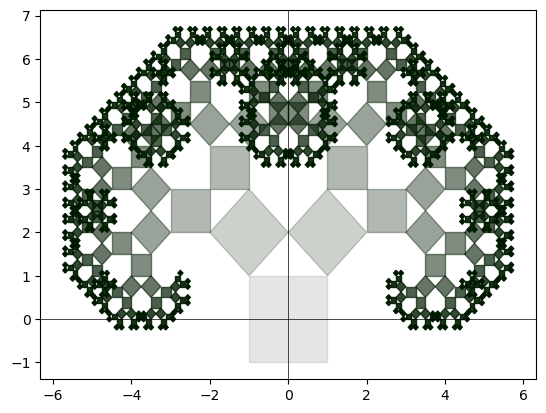

End


In [65]:
def calc_diff(start, finish):
    return finish - start

start_points = torch.tensor([[1, -1],
                             [-1, -1],
                             [-1, 1],
                             [1, 1],
                             [1, -1]], dtype=torch.float32)  

angle = np.pi / 4
clk_rotation_matrix = torch.tensor([[np.cos(angle), np.sin(angle)],
                                    [-np.sin(angle), np.cos(angle)]], dtype=torch.float32)

anti_clk_rotation_matrix = torch.tensor([[np.cos(angle), -np.sin(angle)],
                                         [np.sin(angle), np.cos(angle)]], dtype=torch.float32)

current_points = start_points
x = current_points[:, 0]
y = current_points[:, 1]

def get_alpha(depth):
    return min(1, 0.1 + depth * 0.1)

plt.fill(x, y, color=(0, 0, 0, get_alpha(0)))  

binary_tree = [start_points]



def left_square(current_points, depth):
    rotated_points = torch.matmul(current_points, clk_rotation_matrix)
    rotated_points /= np.sqrt(2)  
    x_delta, y_delta = calc_diff(current_points[2], rotated_points[1])     
    rotated_points[:, 0] -= x_delta
    rotated_points[:, 1] -= y_delta
    x = rotated_points[:, 0]
    y = rotated_points[:, 1]
    alpha = get_alpha(depth)  
    plt.fill(x, y, color=(0, 0.1, 0, alpha))  
    return rotated_points

def right_square(current_points, depth):
    rotated_points = torch.matmul(current_points, anti_clk_rotation_matrix)
    rotated_points /= np.sqrt(2) 
    x_delta, y_delta = calc_diff(current_points[3], rotated_points[0])  

    rotated_points[:, 0] -= x_delta
    rotated_points[:, 1] -= y_delta
    x = rotated_points[:, 0]
    y = rotated_points[:, 1]
    alpha = get_alpha(depth)  
    plt.fill(x, y, color=(0, 0.1, 0, alpha))  
    return rotated_points



for i in range(2, 1023):
    depth = int(math.log(i, 2))  
    if i % 2 == 0:
        index = int((i / 2) - 1)
        binary_tree.append(right_square(binary_tree[index], depth))
    else:
        index = int(((i - 1) / 2) - 1)
        binary_tree.append(left_square(binary_tree[index], depth))

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()
print("End")

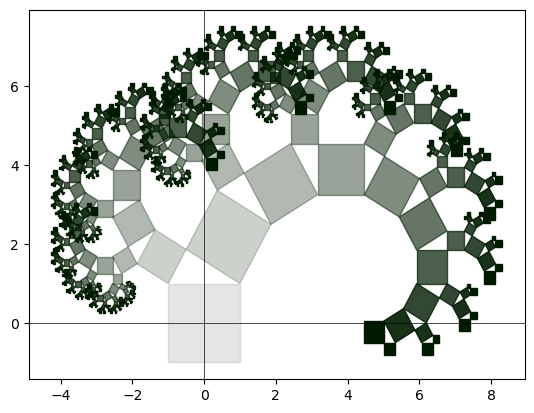

End


In [66]:
def calc_diff(start, finish):
    return finish - start

start_points = torch.tensor([[1, -1],
                             [-1, -1],
                             [-1, 1],
                             [1, 1],
                             [1, -1]], dtype=torch.float32)  

l_angle = np.pi/3
r_angle = np.pi/6
clk_rotation_matrix = torch.tensor([[np.cos(l_angle), np.sin(l_angle)],
                                    [-np.sin(l_angle), np.cos(l_angle)]], dtype=torch.float32)

anti_clk_rotation_matrix = torch.tensor([[np.cos(r_angle), -np.sin(r_angle)],
                                         [np.sin(r_angle), np.cos(r_angle)]], dtype=torch.float32)

current_points = start_points
x = current_points[:, 0]
y = current_points[:, 1]

def get_alpha(depth):
    return min(1, 0.1 + depth * 0.1)

plt.fill(x, y, color=(0, 0, 0, get_alpha(0)))  

binary_tree = [start_points]

def left_square(current_points, depth):
    rotated_points = torch.matmul(current_points, clk_rotation_matrix)
    rotated_points /= 2 
    x_delta, y_delta = calc_diff(current_points[2], rotated_points[1])     
    rotated_points[:, 0] -= x_delta
    rotated_points[:, 1] -= y_delta
    x = rotated_points[:, 0]
    y = rotated_points[:, 1]
    alpha = get_alpha(depth)  
    plt.fill(x, y, color=(0, 0.1, 0, alpha))  
    return rotated_points

def right_square(current_points, depth):
    rotated_points = torch.matmul(current_points, anti_clk_rotation_matrix)
    rotated_points *= (np.sqrt(3)/2)
    x_delta, y_delta = calc_diff(current_points[3], rotated_points[0])  

    rotated_points[:, 0] -= x_delta
    rotated_points[:, 1] -= y_delta
    x = rotated_points[:, 0]
    y = rotated_points[:, 1]
    alpha = get_alpha(depth)  
    plt.fill(x, y, color=(0, 0.1, 0, alpha))  
    return rotated_points


for i in range(2, 1023):
    depth = int(math.log(i, 2))  
    if i % 2 == 0:
        index = int((i / 2) - 1)
        binary_tree.append(right_square(binary_tree[index], depth))
    else:
        index = int(((i - 1) / 2) - 1)
        binary_tree.append(left_square(binary_tree[index], depth))

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()
print("End")